# Future Price Time Series Model Wards 3 & 4

In [1]:
# ResidentialSalesWithLocation_CSV

setwd("D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report")  #set my working directory
getwd()

HOUSE.df <- read.csv("ResidentialSalesWithLocation_CSV.csv", header = TRUE)  #import data into R

######################### Verify the data ##########################
head(HOUSE.df)   #Verify the first five rows of the dataframe

tail(HOUSE.df)   #Verify the last five rows of the dataframe

summary(HOUSE.df)   #To check the variables and counts

str(HOUSE.df)   #To check the data structure of the loaded dataset
####################################################################

[1] "D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report"

,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,0150 0275,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407639,Old City 2,Ward 1,38.91745,-77.04023,5
2,0150 0276,1,0,7,Warm Cool,Y,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407640,Old City 2,Ward 1,38.91745,-77.04017,1
3,0150 0277,1,0,13,Hot Water Rad,N,1,6,3,1900,⋯,0,11,960,2022/08/31 05:17:11+00,74407641,Old City 2,Ward 1,38.91745,-77.04012,1
4,0150 0278,2,1,7,Warm Cool,Y,1,6,2,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407642,Old City 2,Ward 1,38.91745,-77.04006,5
5,0150 0279,1,1,7,Warm Cool,Y,1,6,3,1900,⋯,1,11,960,2022/08/31 05:17:11+00,74407643,Old City 2,Ward 1,38.91745,-77.04000,1
6,0150 0280,1,1,7,Warm Cool,Y,1,6,3,1910,⋯,1,11,960,2022/08/31 05:17:11+00,74407644,Old City 2,Ward 1,38.91745,-77.03995,1


,SSL,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,⋯,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,OBJECTID,ASSESSMENT_NBHD,WARD,LATITUDE,LONGITUDE,YR_RMDL_CAT_2
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>
108398,PAR 01550236,2,0,13,Hot Water Rad,N,1,6,2,1934,⋯,1,12,4571,2022/08/31 05:17:11+00,74624612,Woodridge,Ward 5,38.92890,-76.97456,1
108399,PAR 01550251,2,0,1,Forced Air,Y,1,6,3,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624613,Woodridge,Ward 5,38.92700,-76.97157,4
108400,PAR 01550252,1,0,13,Hot Water Rad,N,1,5,2,1935,⋯,0,12,3000,2022/08/31 05:17:11+00,74624614,Woodridge,Ward 5,38.92706,-76.97145,1
108401,PAR 01550254,3,0,13,Hot Water Rad,N,1,5,3,1922,⋯,0,12,7829,2022/08/31 05:17:11+00,74624615,Woodridge,Ward 5,38.92790,-76.97388,2
108402,PAR 01550255,3,1,1,Forced Air,Y,1,10,4,1925,⋯,0,13,4001,2022/08/31 05:17:11+00,74624616,Woodridge,Ward 5,38.92924,-76.97320,4
108403,PAR 01550259,1,0,13,Hot Water Rad,N,1,6,3,1940,⋯,0,11,1399,2022/08/31 05:17:11+00,74624617,Woodridge,Ward 5,38.92924,-76.97465,1


     SSL                BATHRM         HF_BATHRM            HEAT      
 Length:108403      Min.   : 0.000   Min.   : 0.0000   Min.   : 0.00  
 Class :character   1st Qu.: 1.000   1st Qu.: 0.0000   1st Qu.: 1.00  
 Mode  :character   Median : 2.000   Median : 1.0000   Median : 7.00  
                    Mean   : 2.124   Mean   : 0.6298   Mean   : 7.27  
                    3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:13.00  
                    Max.   :30.000   Max.   :12.0000   Max.   :13.00  
                    NA's   :1371     NA's   :1371      NA's   :1371   
    HEAT_D               AC              NUM_UNITS          ROOMS        
 Length:108403      Length:108403      Min.   : 0.000   Min.   :  0.000  
 Class :character   Class :character   1st Qu.: 1.000   1st Qu.:  6.000  
 Mode  :character   Mode  :character   Median : 1.000   Median :  7.000  
                                       Mean   : 1.196   Mean   :  7.397  
                                       3rd Qu.: 1.000   3rd Qu

'data.frame':	108403 obs. of  44 variables:
 $ SSL              : chr  "0150    0275" "0150    0276" "0150    0277" "0150    0278" ...
 $ BATHRM           : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM        : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT             : int  7 7 13 7 7 7 7 7 7 7 ...
 $ HEAT_D           : chr  "Warm Cool" "Warm Cool" "Hot Water Rad" "Warm Cool" ...
 $ AC               : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS            : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM            : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB              : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ YR_RMDL          : int  2004 NA NA 2016 NA NA 2001 NA 2003 2015 ...
 $ EYB              : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE         : chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE     

In [2]:
################################################################################
# Create a new data set for the total population
# Three features, "SALEDATE", "PRICE", and "Ward"

HOUSE_TS1.df <- subset(HOUSE.df, select = c(SALEDATE, PRICE, WARD))

head(HOUSE_TS1.df)     #Verify the first five rows of the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts

str(HOUSE_TS1.df)   #To check the data structure of the loaded dataset
################################################################################

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013/07/22 00:00:00+00,755000,Ward 1
2,1900/01/01 00:00:00+00,NA,Ward 1
3,1996/02/12 00:00:00+00,118000,Ward 1
4,2022/04/06 00:00:00+00,1110000,Ward 1
5,2017/03/24 00:00:00+00,0,Ward 1
6,2000/06/30 00:00:00+00,251000,Ward 1


   SALEDATE             PRICE              WARD          
 Length:108403      Min.   :       0   Length:108403     
 Class :character   1st Qu.:       0   Class :character  
 Mode  :character   Median :  294000   Mode  :character  
                    Mean   :  465255                     
                    3rd Qu.:  715000                     
                    Max.   :25100000                     
                    NA's   :14181                        

'data.frame':	108403 obs. of  3 variables:
 $ SALEDATE: chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE   : int  755000 NA 118000 1110000 0 251000 930388 606500 0 162000 ...
 $ WARD    : chr  "Ward 1" "Ward 1" "Ward 1" "Ward 1" ...


In [3]:
################################################################################
# Remove 0s and NA's from the "PRICE" variable
HOUSE_TS1.df[HOUSE_TS1.df==0] <- NA     # Set all 0s to NA

HOUSE_TS1.df <- na.omit(HOUSE_TS1.df)     # Removes all NA's from the dataframe

summary(HOUSE_TS1.df)     #To check the variables and counts
################################################################################

   SALEDATE             PRICE              WARD          
 Length:62008       Min.   :       1   Length:62008      
 Class :character   1st Qu.:  300000   Class :character  
 Mode  :character   Median :  557985   Mode  :character  
                    Mean   :  706961                     
                    3rd Qu.:  894000                     
                    Max.   :25100000                     

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




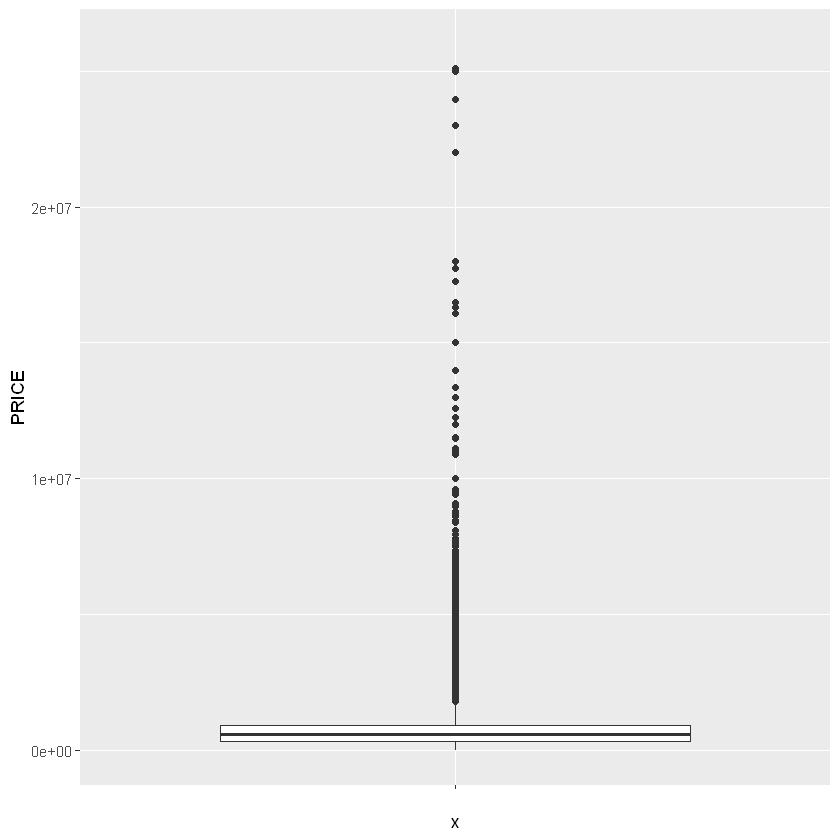

In [4]:
################################################################################
# Boxplot of the "PRICE" variable
# Install packages
install.packages("ggplot2")
install.packages("dplyr")
library("ggplot2")
library("dplyr")

# Create boxplot of the "PRICE" variable 
ggplot(data = HOUSE_TS1.df, aes(x = "", y = PRICE)) + 
  geom_boxplot() +
  coord_cartesian(ylim = c(0, 26000000)) # Set the y axis scale
################################################################################


In [5]:
################################################################################
# Install packages to work with dates
install.packages("lubridate")  # general package for handling and converting dates)
install.packages("linelist")   # has function to "guess" messy dates
install.packages("aweek")      # another option for converting dates to weeks, and weeks to dates
install.packages("zoo")        # additional date/time functions
install.packages("tidyverse")  # data management and visualization  
install.packages("rio")        # data import/export
library("lubridate")  
library("linelist")   
library("aweek")      
library("zoo")        
library("tidyverse")    
library("rio")   
################################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"restored 'lubridate'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'linelist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'aweek' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'zoo' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zoo'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\zoo\libs\x64\zoo.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\zoo\libs\x64\zoo.dll: Permission denied"
Warning message:
"restored 'zoo'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages


Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [6]:
################################################################################
# Clean up Date attribute
class(HOUSE_TS1.df$SALEDATE)   #Check the class of the "SALEDATE" field

# Because "SALEDATE" is class 'character', we must convert it to class 'Date'
# Tell R how to identify the date parts of the "SALEDATE" field
# The format = argument specifies the date components and 
# drops the time component in the "SALEDATE'
HOUSE_TS1.df$SALEDATE <- as.Date(HOUSE_TS1.df$SALEDATE, format = "%Y/%m/%d")

head(HOUSE_TS1.df)   # Verify the time component was dropped

class(HOUSE_TS1.df$SALEDATE)   # Check the class of the "SALEDATE" field 

# Drop the 'day' from the date
HOUSE_TS2.df <- HOUSE_TS1.df
HOUSE_TS2.df$SALEDATE <- format(HOUSE_TS2.df$SALEDATE, format = "%Y-%m")

head(HOUSE_TS2.df)   # Verify the day component was dropped
################################################################################

[1] "character"

,SALEDATE,PRICE,WARD
,<date>,<int>,<chr>
1,2013-07-22,755000,Ward 1
3,1996-02-12,118000,Ward 1
4,2022-04-06,1110000,Ward 1
6,2000-06-30,251000,Ward 1
7,2021-11-22,930388,Ward 1
8,2006-02-06,606500,Ward 1


[1] "Date"

,SALEDATE,PRICE,WARD
,<chr>,<int>,<chr>
1,2013-07,755000,Ward 1
3,1996-02,118000,Ward 1
4,2022-04,1110000,Ward 1
6,2000-06,251000,Ward 1
7,2021-11,930388,Ward 1
8,2006-02,606500,Ward 1


In [7]:
################################################################################
# Filter database for only Wards 3 & 4

HOUSE_TS2.df <- subset(HOUSE_TS2.df, WARD %in% c("Ward 3", "Ward 4"))

summary(HOUSE_TS2.df)     #To check the variables and counts

str(HOUSE_TS2.df)   #To check the data structure

# Create a new data set for the Ward 1 &2 population
# Drop the Ward attribute and keep two features, "SALEDATE", "PRICE"

HOUSE_TS2.df <- subset(HOUSE_TS2.df, select = c(SALEDATE, PRICE))

head(HOUSE_TS2.df)     #Verify the first five rows of the dataframe

################################################################################

   SALEDATE             PRICE              WARD          
 Length:19156       Min.   :    4156   Length:19156      
 Class :character   1st Qu.:  449000   Class :character  
 Mode  :character   Median :  762000   Mode  :character  
                    Mean   :  897598                     
                    3rd Qu.: 1115000                     
                    Max.   :18000000                     

'data.frame':	19156 obs. of  3 variables:
 $ SALEDATE: chr  "2013-04" "2001-12" "2011-07" "2019-05" ...
 $ PRICE   : int  949000 402000 729000 1080000 970000 1039000 749000 755000 590000 1025750 ...
 $ WARD    : chr  "Ward 3" "Ward 3" "Ward 3" "Ward 3" ...


,SALEDATE,PRICE
,<chr>,<int>
22006,2013-04,949000
22008,2001-12,402000
22011,2011-07,729000
22012,2019-05,1080000
22018,2017-07,970000
22020,2018-11,1039000


In [8]:
################################################################################
# Calculate the mean "Price" by "SALEDATE" (year and month)
HOUSE_TS3.df <- HOUSE_TS2.df
HOUSE_TS3.df <- aggregate(PRICE~SALEDATE,HOUSE_TS2.df,mean)

summary(HOUSE_TS2.df)   #To check the variables and counts before the aggregation

summary(HOUSE_TS3.df)   #To check the variables and counts after the aggregation

head(HOUSE_TS3.df, 20)

tail(HOUSE_TS3.df, 20)

# Filter the dataframe for only sales after 2010-01
HOUSE_TS4.df <- HOUSE_TS3.df
HOUSE_TS4.df <- HOUSE_TS4.df %>% filter(SALEDATE > '2010-01')

summary(HOUSE_TS4.df)   #To check the variables and counts

str(HOUSE_TS4.df)   #To check the data structure   
################################################################################

   SALEDATE             PRICE         
 Length:19156       Min.   :    4156  
 Class :character   1st Qu.:  449000  
 Mode  :character   Median :  762000  
                    Mean   :  897598  
                    3rd Qu.: 1115000  
                    Max.   :18000000  

   SALEDATE             PRICE        
 Length:372         Min.   :  87500  
 Class :character   1st Qu.: 368693  
 Mode  :character   Median : 749232  
                    Mean   : 713934  
                    3rd Qu.: 969056  
                    Max.   :2650000  

,SALEDATE,PRICE
,<chr>,<dbl>
1,1979-07,99500.0
2,1986-05,87500.0
3,1987-06,535000.0
4,1991-08,2650000.0
5,1992-01,240830.7
6,1992-02,292350.0
7,1992-03,293353.5
8,1992-04,258525.8
9,1992-05,280806.6


,SALEDATE,PRICE
,<chr>,<dbl>
353,2021-01,1295577
354,2021-02,1320178
355,2021-03,1195224
356,2021-04,1223642
357,2021-05,1319893
358,2021-06,1494754
359,2021-07,1570571
360,2021-08,1304804
361,2021-09,1229359


   SALEDATE             PRICE        
 Length:151         Min.   : 617821  
 Class :character   1st Qu.: 887311  
 Mode  :character   Median :1048374  
                    Mean   :1032869  
                    3rd Qu.:1140913  
                    Max.   :1598488  

'data.frame':	151 obs. of  2 variables:
 $ SALEDATE: chr  "2010-02" "2010-03" "2010-04" "2010-05" ...
 $ PRICE   : num  645984 655748 617821 758240 862644 ...


In [9]:
####################################################################
# Set time series (ts) for 'PRICE' variable

# Choose the 'PRICE' column and convert it to ts object

H_TS <- ts(HOUSE_TS4.df$PRICE, start=c(2010, 1), freq=12)

# Let us see the ts object

H_TS
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,645984.4,655747.7,617820.6,758240.0,862644.3,860677.9,885063.4,714026.7,860230.3,1243655.8,895836.0,807402.2
2011,668141.2,833048.4,907740.2,820270.8,778029.7,823540.2,837800.4,679048.3,797462.6,758502.3,810089.1,814696.7
2012,791203.6,947594.9,791654.7,1057884.2,838117.4,838724.3,903500.4,816894.7,934153.8,850313.5,873872.0,1091879.4
2013,797343.8,951375.1,879883.0,915533.4,1032130.3,1354337.0,960447.0,957097.3,1208350.3,889559.4,729913.7,811911.4
2014,1082036.5,909868.3,884898.9,1039570.8,1111154.6,1048373.5,925388.2,897472.2,943856.8,834024.8,800659.4,984138.2
2015,800835.0,903164.8,956032.3,918481.4,980753.7,929897.6,971357.1,1087630.0,1151277.2,1073468.8,1160561.1,1048773.5
2016,842502.2,899125.4,924369.5,1118446.7,1066915.9,1059081.1,1078815.9,1007260.6,1064544.7,988051.9,1039001.1,1051174.6
2017,1354467.4,1010625.6,1055788.1,1062386.8,1059228.2,1223260.2,1147640.0,862490.0,967289.3,906677.9,1070139.8,1110094.1
2018,1022882.9,1079793.4,1021915.4,1155063.2,1064009.3,1161080.0,1066985.3,1059125.3,1044170.8,1188609.4,968289.4,976162.5
2019,1090363.5,1110344.5,1091048.4,1109862.1,1155835.7,1073631.3,1123002.4,1062020.8,1046795.6,1134186.8,1080747.8,1083281.6


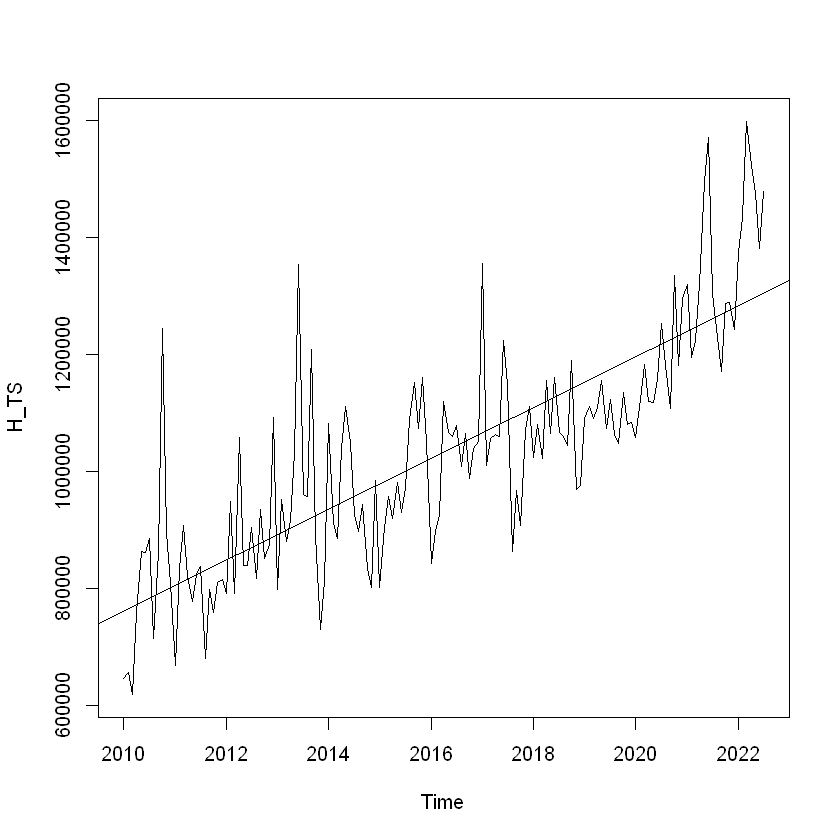

In [10]:
#####################################################################
# Let us fit a regression line on the dataset

plot(H_TS)

abline(reg=lm(H_TS~time(H_TS)))
#####################################################################

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,1,2,3,4,5,6,7,8,9,10,11,12
2012,1,2,3,4,5,6,7,8,9,10,11,12
2013,1,2,3,4,5,6,7,8,9,10,11,12
2014,1,2,3,4,5,6,7,8,9,10,11,12
2015,1,2,3,4,5,6,7,8,9,10,11,12
2016,1,2,3,4,5,6,7,8,9,10,11,12
2017,1,2,3,4,5,6,7,8,9,10,11,12
2018,1,2,3,4,5,6,7,8,9,10,11,12
2019,1,2,3,4,5,6,7,8,9,10,11,12


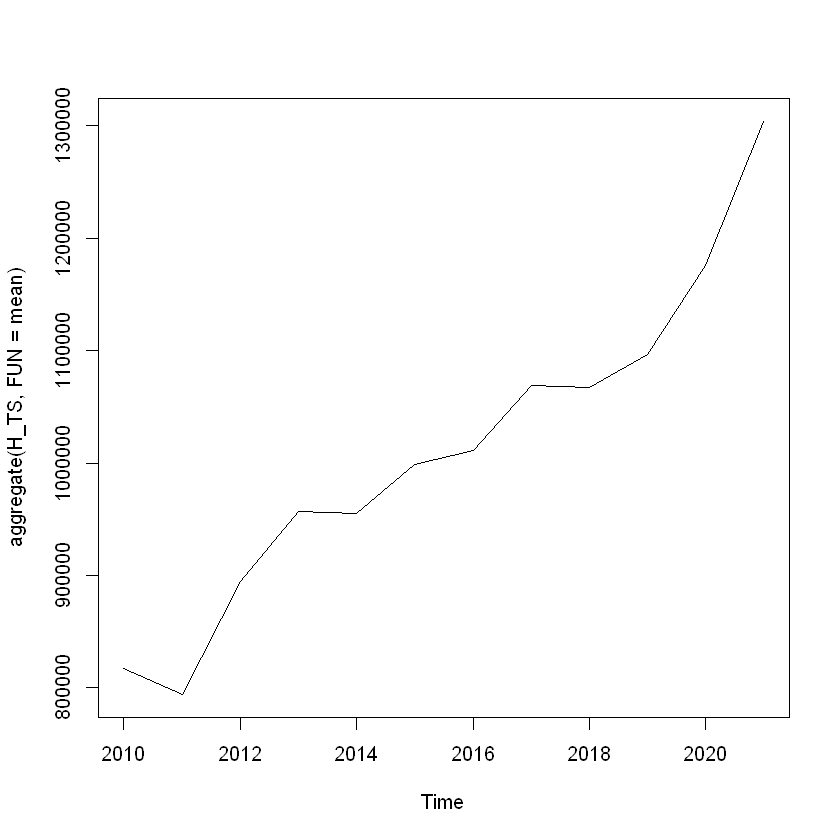

In [11]:
#####################################################################
# First let us plot the cycle and trend
# Aggregate the cycles and display a year-on-year trend

cycle(H_TS)

plot(aggregate(H_TS,FUN=mean))

#####################################################################

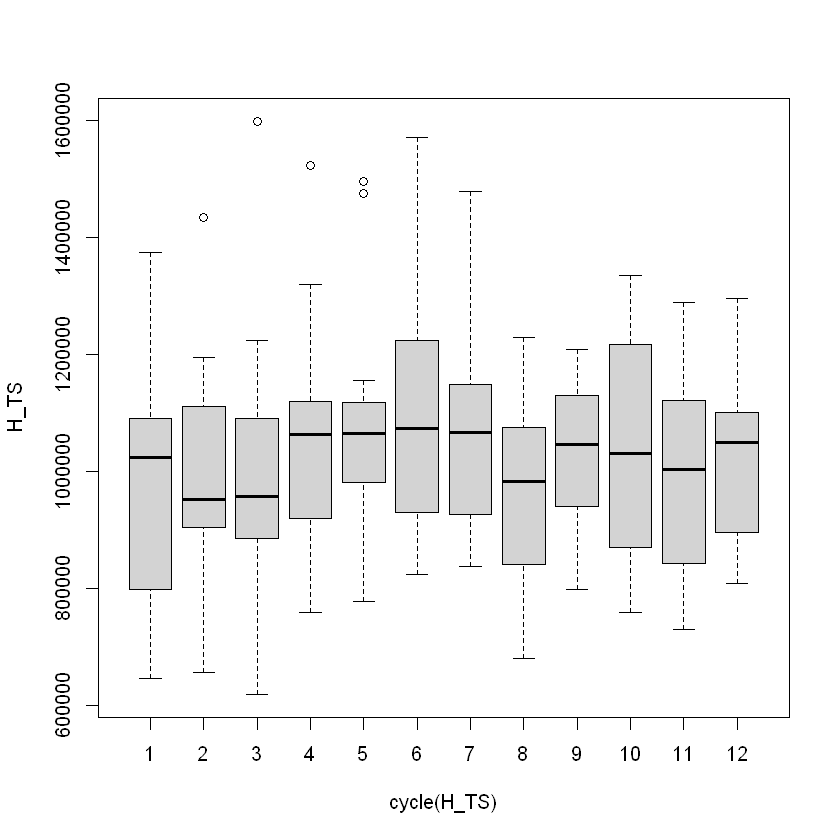

In [12]:
#####################################################################
# Letâ™s look in to the seasonal effects

boxplot(H_TS~cycle(H_TS))

#####################################################################

In [13]:
#####################################################################
# Since we want to remove the unequal variances in the data we will take the log of the series
# Before we fit the ARIMA model to our time series, we need to remove the unequal variances in 
# the data by taking the log of the series.

# Also, the original signal had trends and seasonal effects, so it was not stationary.  
# Therefore, we perform a diff of the signal and check if the trends and seasonal effect can be removed. 


library(tseries)

# Now perform the Augmented Dickey-Fuller Test

adf.test(diff(log(H_TS)), alternative="stationary", k=0)

# This will give you the result of the Augmented Dickey-Fuller Test
#####################################################################

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(diff(log(H_TS)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(log(H_TS))
Dickey-Fuller = -17.244, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


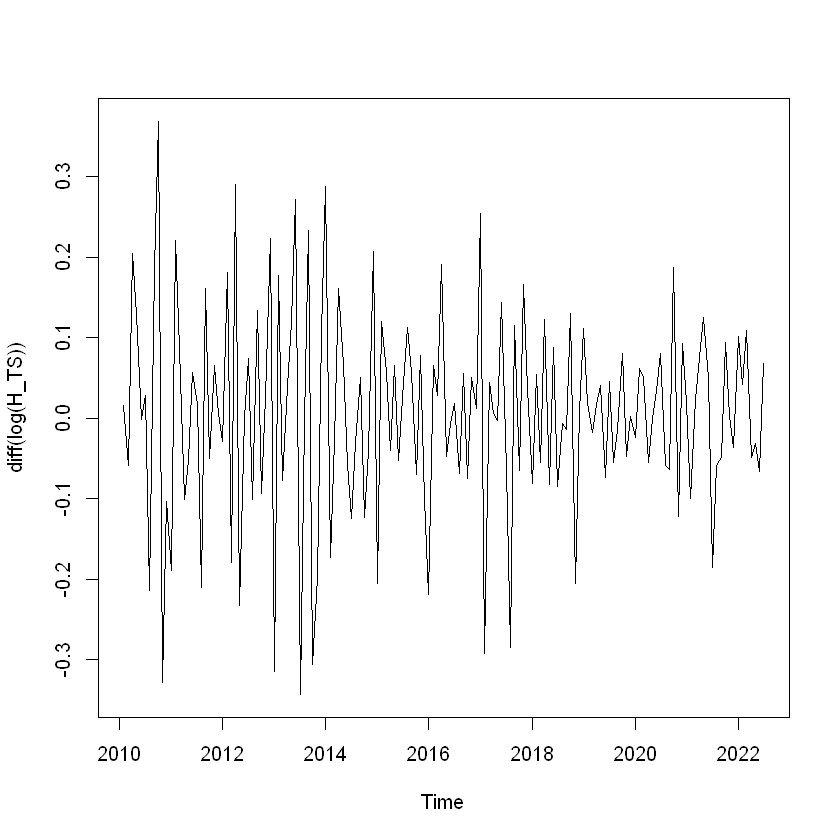

In [14]:
#####################################################################
# Let us now plot the series

plot(diff(log(H_TS)))

#####################################################################

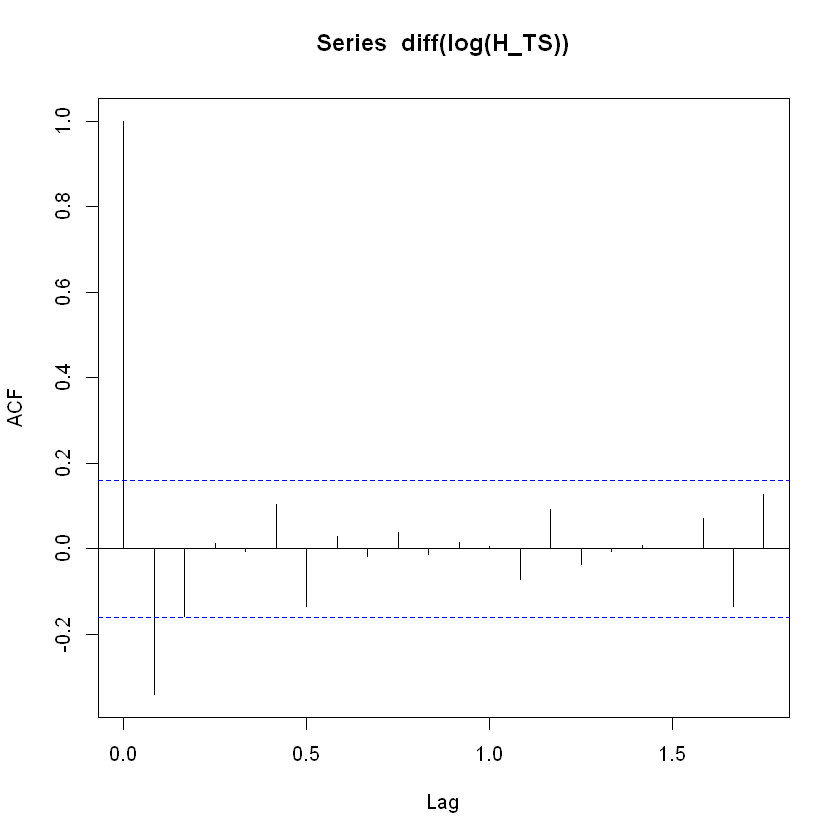

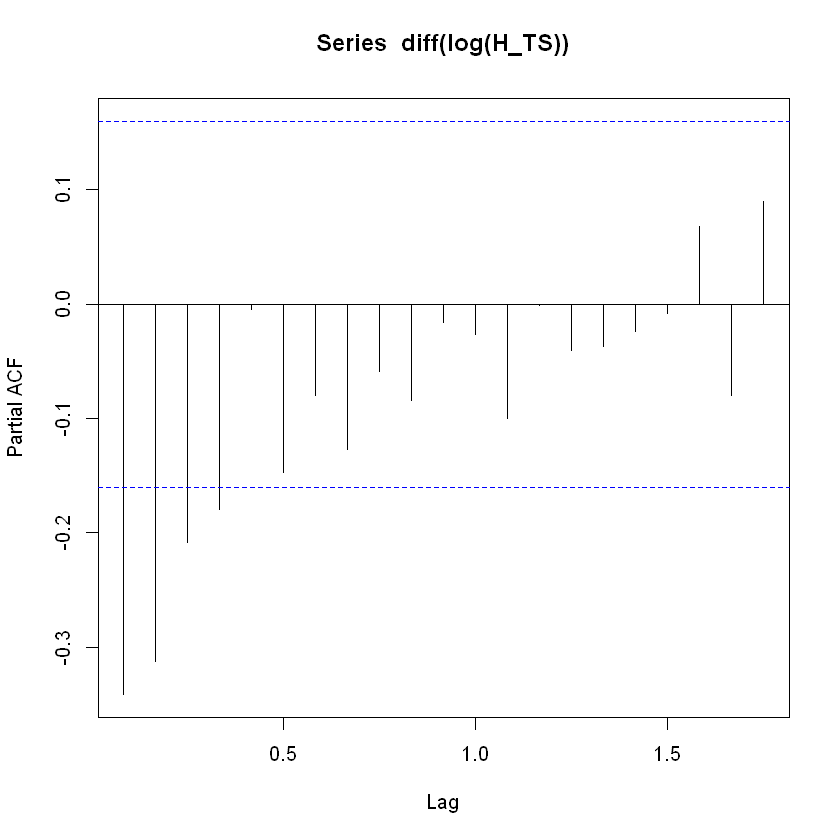

In [15]:
#####################################################################
# Now let us look into the ACF  and PACF charts

acf(diff(log(H_TS)))

pacf(diff(log(H_TS)))

# ARIMA (1,1,2)

#####################################################################

In [16]:
#####################################################################
# Let us now fit the ARIMA(1,1,2)

(fit_open <- arima(log(H_TS), c(1, 1, 2),seasonal = list(order = c(1, 1, 2), period = 12)))

#####################################################################


Call:
arima(x = log(H_TS), order = c(1, 1, 2), seasonal = list(order = c(1, 1, 2), 
    period = 12))

Coefficients:
         ar1      ma1      ma2     sar1     sma1     sma2
      0.0137  -0.6626  -0.2225  -0.1500  -0.7659  -0.0765
s.e.  0.0267   0.0437   0.0352   0.0373   0.0513   0.0336

sigma^2 estimated as 0.01201:  log likelihood = 99.94,  aic = -185.88

In [17]:
install.packages("forecast") 
library(forecast) 


#####################################################################
# Now let us do some prediction for the next 7 years

# Monthly Average Sale Price
pred_H_TS <- predict(fit_open, n.ahead = 7*12)

pred_H_TS

pred_H_TS$pred2 <- 2.71828^(pred_H_TS$pred)

pred_H_TS


# Calculate mean and standard deviation of the prediction
Avg.vF <- mean(pred_H_TS$pred2)
Avg.vF

StandD <- sd(pred_H_TS$pred2)
StandD

################################################################################

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'forecast' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'forecast'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\bates\AppData\Local\R\win-library\4.2\00LOCK\forecast\libs\x64\forecast.dll to C:\Users\bates\AppData\Local\R\win-library\4.2\forecast\libs\x64\forecast.dll: Permission denied"
Warning message:
"restored 'forecast'"



The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\Rtmp21AjSg\downloaded_packages


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,14.11305,14.14591,14.17159,14.12548,14.16064
2023,14.14975,14.16099,14.16949,14.22256,14.23672,14.26301,14.22871,14.15255,14.19114,14.22058,14.17806,14.20816
2024,14.20445,14.21842,14.23346,14.27962,14.29011,14.31018,14.28357,14.20619,14.24487,14.27376,14.23070,14.26156
2025,14.25677,14.27033,14.28439,14.33158,14.34262,14.36363,14.33586,14.25867,14.29733,14.32631,14.28333,14.31407
2026,14.30945,14.32307,14.33728,14.38431,14.39527,14.41614,14.38854,14.31132,14.34999,14.37895,14.33596,14.36672
2027,14.36207,14.37568,14.38987,14.43693,14.44790,14.46878,14.44117,14.36395,14.40262,14.43158,14.38859,14.41935
2028,14.41470,14.42831,14.44250,14.48956,14.50053,14.52141,14.49380,14.41658,14.45525,14.48421,14.44122,14.47198
2029,14.46733,14.48094,14.49513,14.54219,14.55316,14.57404,14.54643,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1099684,0.1165574,0.1172989,0.1179973,0.1186956


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,14.11305,14.14591,14.17159,14.12548,14.16064
2023,14.14975,14.16099,14.16949,14.22256,14.23672,14.26301,14.22871,14.15255,14.19114,14.22058,14.17806,14.20816
2024,14.20445,14.21842,14.23346,14.27962,14.29011,14.31018,14.28357,14.20619,14.24487,14.27376,14.23070,14.26156
2025,14.25677,14.27033,14.28439,14.33158,14.34262,14.36363,14.33586,14.25867,14.29733,14.32631,14.28333,14.31407
2026,14.30945,14.32307,14.33728,14.38431,14.39527,14.41614,14.38854,14.31132,14.34999,14.37895,14.33596,14.36672
2027,14.36207,14.37568,14.38987,14.43693,14.44790,14.46878,14.44117,14.36395,14.40262,14.43158,14.38859,14.41935
2028,14.41470,14.42831,14.44250,14.48956,14.50053,14.52141,14.49380,14.41658,14.45525,14.48421,14.44122,14.47198
2029,14.46733,14.48094,14.49513,14.54219,14.55316,14.57404,14.54643,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,,,,0.1099684,0.1165574,0.1172989,0.1179973,0.1186956


[1] 1694444

[1] 196485.2

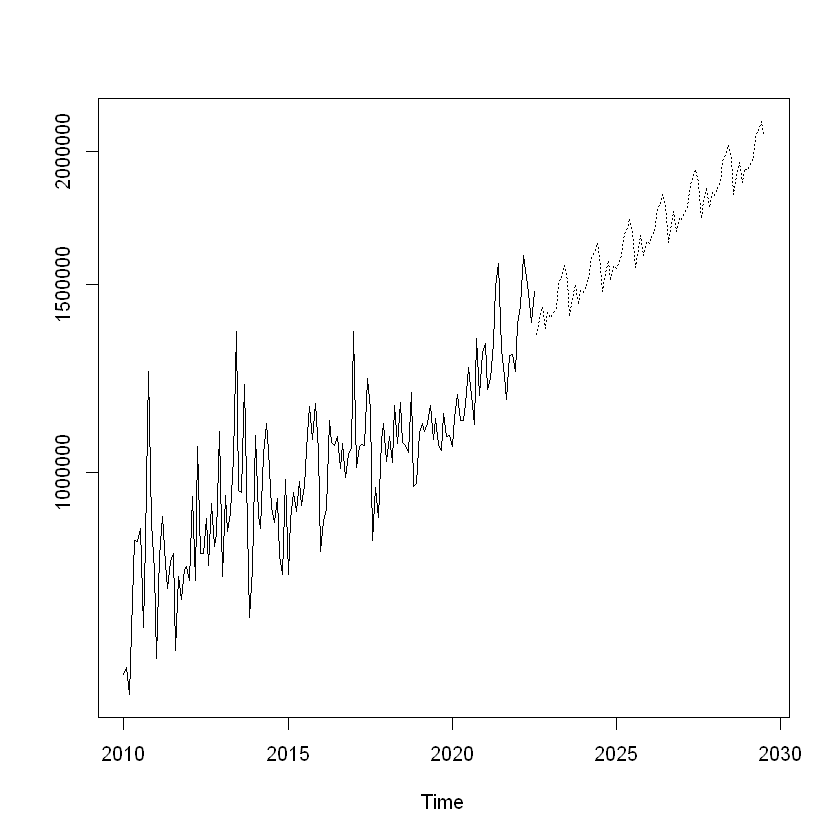

In [18]:
################################################################################

ts.plot(H_TS,2.71828^pred_H_TS$pred, log = "y", lty = c(1,3))

################################################################################

         Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
Aug 2022        1425471 1283454 1567488 1208274 1642667
Sep 2022        1414491 1263704 1565277 1183882 1645099
Oct 2022        1414633 1261615 1567650 1180613 1648652
Nov 2022        1417841 1263601 1572081 1181951 1653730
Dec 2022        1421883 1266643 1577123 1184464 1659302
Jan 2023        1426073 1269893 1582252 1187217 1664928
Feb 2023        1430351 1273252 1587450 1190089 1670613
Mar 2023        1434603 1276593 1592612 1192947 1676258
Apr 2023        1438957 1280042 1597871 1195918 1681995
May 2023        1443300 1283486 1603113 1198886 1687713
Jun 2023        1447663 1286955 1608370 1201882 1693443
Jul 2023        1451948 1290351 1613544 1204807 1699088
Aug 2023        1456294 1293819 1618768 1207810 1704777
Sep 2023        1460623 1297271 1623974 1210798 1710447
Oct 2023        1464947 1300722 1629172 1213786 1716108
Nov 2023        1469270 1304176 1634365 1216780 1721761
Dec 2023        1473593 1307634 1639552 1219780 

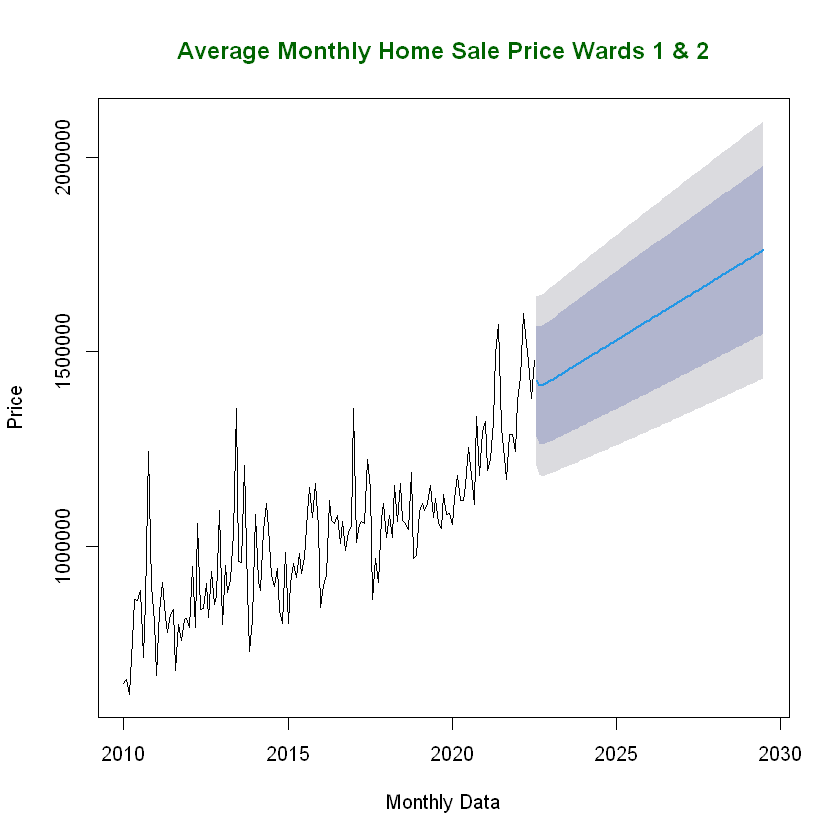

In [19]:
################################Using auto.arima################################
################################################################################

# forecasting model using arima model
fit <- auto.arima(H_TS)

# Next 84 forecasted values
forecast(fit, 84)

# plotting the graph with next
# 84 monthly forecasted values
plot(forecast(fit, 84), xlab ="Monthly Data",
     ylab ="Price",
     main ="Average Monthly Home Sale Price Wards 1 & 2", col.main ="darkgreen")

################################################################################